<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.883 · Aprendizaje por refuerzo</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Módulo 1: Ejemplo del entorno WindyGridWorld

En este _notebook_ cargaremos el escenario _WindyGridWorld_ y veremos la interacción entre algunos agentes y este entorno.

## 1. El entorno __WindyGridWorld__

El entorno __WindyGridWorld__ consiste en un agente que se mueve en una cuadrícula 7x10 (alto x ancho). En cada paso, el agente tiene 4 opciones de acción o movimiento: ARRIBA, ABAJO, DERECHA, IZQUIERDA. El agente siempre sale de la misma casilla [3, 0] y el juego termina cuando el agente llega a la casilla de llegada [3, 7] (suponiendo que la primera celda arriba a la izquierda es la celda [0, 0]). 

El entorno se corresponde con el ejemplo 'Cuadrícula con viento' explicado en la sección 3.1.2. el módulo "Métodos de Diferencia Temporal". El problema radica en que hay un viento que empuja al agente hacia arriba en la parte central de la cuadrícula. Esto provoca que, aunque se ejecute una acción estándar, en la región central los estados resultantes se desplazan hacia arriba por un viento cuya fuerza varía entre columnas.

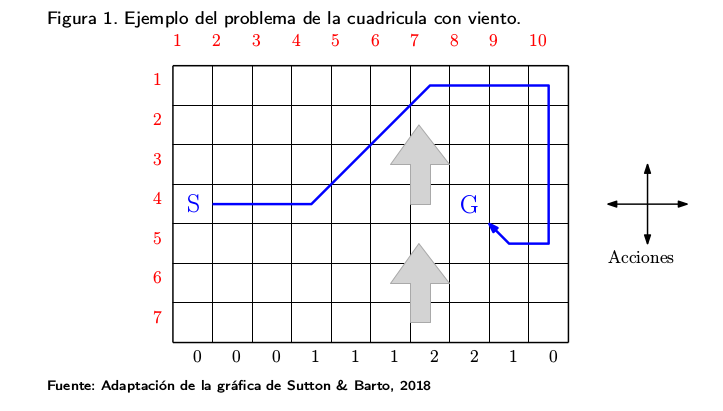

El código para implementar este entorno, que se encuentra disponible en el fichero adjunto `windy_gridworld_env.py`, ha sido adaptado del siguiente enlace:

https://pypi.org/project/gym-gridworlds/

Vamos a empezar cargando el entorno y ver qué características tiene, ejecutando un episodio de prueba.

### 1.1. Carga de datos

El siguiente código carga los paquetes necesarios para el ejemplo, crea el entorno mediante la instanciación de un objeto de la clase `WindyGridworldEnv` (importada del archivo adjunto `windy_gridworld_env.py`) e imprime por pantalla la dimensión del espacio de acciones (0=arriba, 1=derecha, 2=abajo y 3=izquierda), el espacio de observaciones (una tupla que indica la posición del agente en la cuadrícula) y el rango de la variable de recompensa (cuyo valor es -1 para cualquier acción y que por tanto va de menos infinito a más infinito).

In [1]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Ejecutar esta celda sólo si ejecutamos este notebook en Google Colab desde Drive
from google.colab import drive
drive.mount('/content/drive')
#MODIFICAR ACORDE A LA RUTA DE TUS CARPETAS
%cd /content/drive/My Drive/Reinforcement Learning/Materiales curso UOC/Jupyter_notebooks/Aprendizaje-por-refuerzo/M01/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Reinforcement Learning/Materiales curso UOC/Jupyter_notebooks/Aprendizaje-por-refuerzo/M01


In [3]:
import gym
import numpy as np
import windy_gridworld_env as wge

env = wge.WindyGridworldEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(7), Discrete(10)) 
Reward range is (-inf, inf) 


### 1.2. Ejecución de un episodio

A continuación, realizaremos la ejecución de un episodio del entorno WindyGridWorld utilizando un agente que selecciona las acciones de forma aleatoria.

In [4]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L",
    }

while not done:
    # Elegir una acción aleatoria (ésta es la implementación del agente)
    action = env.action_space.sample()
    
    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)
    
    # Imprimir time-step
    print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))
    
    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1
    
print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Se han truncado las últimas 5000 líneas del flujo de salida.
Action: L -> Obs: (2, 8) and reward: -1
Action: D -> Obs: (2, 8) and reward: -1
Action: R -> Obs: (1, 9) and reward: -1
Action: R -> Obs: (1, 9) and reward: -1
Action: R -> Obs: (1, 9) and reward: -1
Action: U -> Obs: (0, 9) and reward: -1
Action: L -> Obs: (0, 8) and reward: -1
Action: L -> Obs: (0, 7) and reward: -1
Action: U -> Obs: (0, 7) and reward: -1
Action: U -> Obs: (0, 7) and reward: -1
Action: R -> Obs: (0, 8) and reward: -1
Action: R -> Obs: (0, 9) and reward: -1
Action: U -> Obs: (0, 9) and reward: -1
Action: R -> Obs: (0, 9) and reward: -1
Action: U -> Obs: (0, 9) and reward: -1
Action: L -> Obs: (0, 8) and reward: -1
Action: R -> Obs: (0, 9) and reward: -1
Action: L -> Obs: (0, 8) and reward: -1
Action: L -> Obs: (0, 7) and reward: -1
Action: D -> Obs: (0, 7) and reward: -1
Action: R -> Obs: (0, 8) and reward: -1
Action: U -> Obs: (0, 8) and reward: -1
Action: L -> Obs: (0, 7) and reward: -1
Action: D -> Obs: (

## 2. Modificación del entorno

El entorno WindyGridWorld tiene varios parámetros que pueden ser modificados:

*   La dimensión de la cuadrícula.
*   La posición y fuerza del viento.
*   La posición de las casillas de salida y de llegada.

A continuación, modificaremos el código de WindyGridWorld (fichero `windy_gridworld_env.py`) para que represente las propiedades de la cuadrícula descritas a continuación.

- Cuadrícula 15x15
- Fuerza del viento = [0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1. 0, 0, 0]
- Casilla de inico [8,0]
- Casilla final [8,7]

El entorno modificado se ha almacenado en el archivo `windy_gridworld_env_v2.py`, que se puede encontrar en la misma carpeta del repositorio.

In [5]:
import gym
import numpy as np
import windy_gridworld_env_v2 as wge

env = wge.WindyGridworldEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

Action space is Discrete(4) 
Observation space is Tuple(Discrete(15), Discrete(15)) 
Reward range is (-inf, inf) 


A continuación, implementaremos un agente que siempre realice la misma acción: 
* ir hacia la derecha y modificar el código para que sólo realice 10 _time-steps_.

Mostraremos la trayectoria seguida por el agente, mostrando las coordenadas de las casillas visitadas en orden.

In [6]:
# Environment reset
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: {} ".format(obs))

switch_action = {
        0: "U",
        1: "R",
        2: "D",
        3: "L"
    }

Obs inicial: (8, 0) 


In [7]:
max_steps = 10

while t < max_steps:
    # Elegimos siempre ir hacia la derecha (DERECHA=1)
    action = 1
    
    # Ejecutamos la acción y esperamos la respuesta del entorno
    new_obs, reward, done, info = env.step(action)
    
    # Imprimimos el time-step
    print("Action: {} -> Obs: {} and reward: {}".format(switch_action[action], new_obs, reward))
        
    obs = new_obs
    total_reward += reward
    t += 1
    if done:
        break

print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
env.close()

Action: R -> Obs: (8, 1) and reward: -1
Action: R -> Obs: (8, 2) and reward: -1
Action: R -> Obs: (8, 3) and reward: -1
Action: R -> Obs: (7, 4) and reward: -1
Action: R -> Obs: (6, 5) and reward: -1
Action: R -> Obs: (5, 6) and reward: -1
Action: R -> Obs: (3, 7) and reward: -1
Action: R -> Obs: (1, 8) and reward: -1
Action: R -> Obs: (0, 9) and reward: -1
Action: R -> Obs: (0, 10) and reward: -1
Episode finished after 10 timesteps and reward was -10 
